# Examen segundo parcial
## Mitsiu Alejandro Carreño Sarabia - E23S-18014

Para esta actividad el escenario es el siguiente, se le proporcionará un data set con datos demográficos, en el cual usted como analista de datos, tendrá que realizar el examen haciendo uso de la herramienta de Python en Google Colab para resolverlo. 

Una vez concluido subir su examen en el apartado indicado (Deadline viernes 13 de octubre a la media noche), el día sábado 14 de octubre se realizará una revisión en donde usted explicara al profesor los datos estadísticos encontrados durante su análisis, y cuáles y como fueron las herramientas que uso, así como sus conclusiones al respecto.

Para realizar su análisis en Python, hacer uso de las siguientes herramientas estadísticas:

* 20% Calcular los cuartiles de las columnas "Brith rate" & "Internet users"
* 20% Realizar una gráfica tipo boxplot de las columnas "Brith rate" & "Internet users" (De ser necesario filtrar los datos para tener una visualización óptima)
* 20% Calcular la Desviación estándar e las columnas "Brith rate" & "Internet users"
* 20% Agregar una conclusión de al menos 2 párrafos, de los datos obtenidos en el análisis estadístico.
* 20% Resolver el siguiente problema de distribución binomial: 
                   
Un agente de seguros vende pólizas a cinco personas de la misma edad y que disfrutan de buena salud.
Según las tablas actuales, la probabilidad de que una persona en estas condiciones viva 30 años o más es 2/3.
Encontrar la probabilidad de que, transcurridos 30 años, vivan 3 personas:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("s09_demographic_data.csv")
data.head()

,Country Name,Country Code,Birth rate,Internet users,Income Group
0,Aruba,ABW,10.244,78.9,High income
1,Afghanistan,AFG,35.253,5.9,Low income
2,Angola,AGO,45.985,19.1,Upper middle income
3,Albania,ALB,12.877,57.2,Upper middle income
4,United Arab Emirates,ARE,11.044,88.0,High income


### 1.- Calcular los cuartiles de las columnas "Brith rate" & "Internet users"

In [3]:
# Manual
data["Birth rate"].quantile([0.25, 0.5, 0.75, 1])

0.25    12.1205
0.50    19.6800
0.75    29.7595
1.00    49.6610
Name: Birth rate, dtype: float64

In [4]:
# Librería
data["Internet users"].describe()[["25%", "50%", "75%", "max"]]

25%    14.5200
50%    41.0000
75%    66.2250
max    96.5468
Name: Internet users, dtype: float64

### 2.- Realizar una gráfica tipo boxplot de las columnas "Birth rate" & "Internet users" (De ser necesario filtrar los datos para tener una visualización óptima)

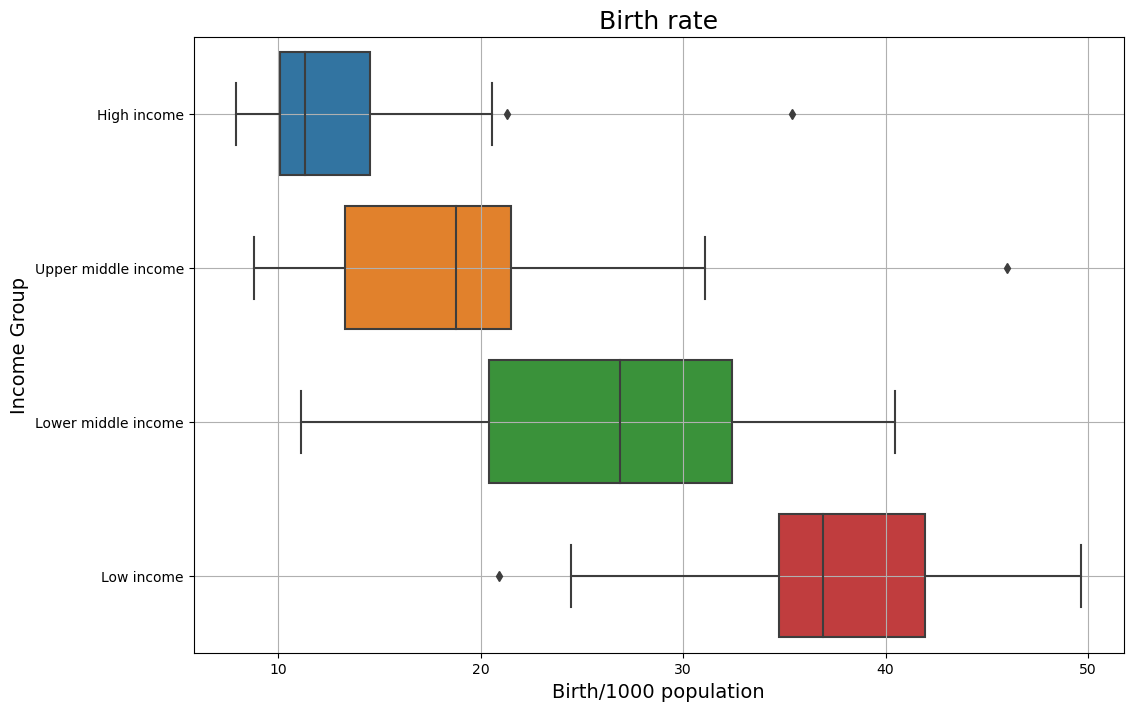

In [5]:
ax = sns.boxplot(x="Birth rate", y="Income Group", 
                 order=['High income', 'Upper middle income', 'Lower middle income', 'Low income'], 
                 data=data)
ax.figure.set_size_inches(12,8)
ax.set_title("Birth rate", fontsize=18)
ax.set_xlabel("Birth/1000 population", fontsize=14)
ax.set_ylabel("Income Group", fontsize=14)
ax.grid(True)

Text(0, 0.5, 'Income Group')

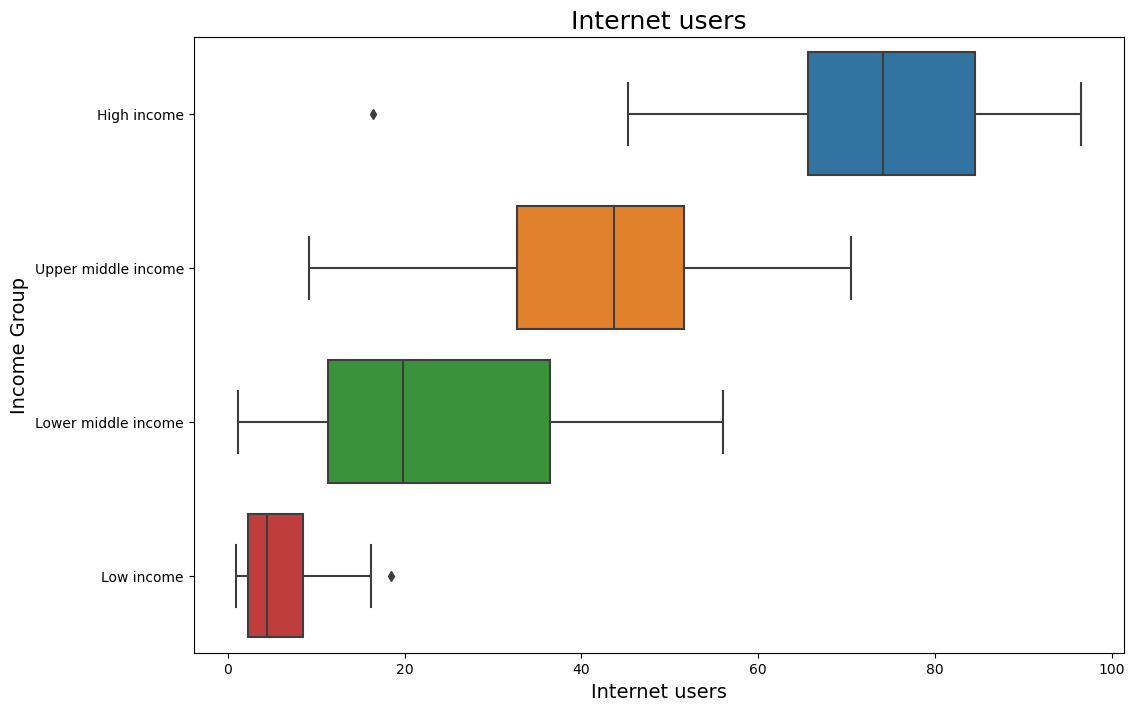

In [6]:
ax = sns.boxplot(x="Internet users", y="Income Group", 
                 order=['High income', 'Upper middle income', 'Lower middle income', 'Low income'], 
                 data=data)
ax.figure.set_size_inches(12,8)
ax.set_title("Internet users", fontsize=18)
ax.set_xlabel("Internet users", fontsize=14)
ax.set_ylabel("Income Group", fontsize=14)


### 3.- Calcular la Desviación estándar e las columnas "Brith rate" & "Internet users"

In [7]:
#Manual
# Desviación respecto a promedio

birthr = data[["Birth rate"]].copy()
mean_birth_r = birthr.mean()[0]

birthr["Desviacion"] = birthr["Birth rate"] - mean_birth_r
#birthr["Desviacion"].abs().mean() # Desviación media absoluta

# Desviación^2
birthr["Desviacion^2"] = birthr["Desviacion"].pow(2)
variance_birth_r = birthr["Desviacion^2"].sum() / (len(birthr) -1) # Varianza

print(f"Desviación estandar de birth rate: {np.sqrt(variance_birth_r)}")


Desviación estandar de birth rate: 10.605466693579938


In [8]:
# Librería
print(f"Desviación estandar de internet users: {data['Internet users'].std()}")

Desviación estandar de internet users: 29.030788424830398


### 4.- Agregar una conclusión de al menos 2 párrafos, de los datos obtenidos en el análisis estadístico.
Con el calculo de los boxplot es mucho más sencillo expresar la tendencia directa entre cantidad de ingresos y cantidad de usuarios de internet y la tendencia inversa entre cantidad de ingresos y tasa de nacimientos. Incluso es sencillo notar la distribución y la cantidad de outliers.      
        
Finalmente con el calculo de los cuartiles y la desviación estandar, permite obtener más insights de la distribución de los datos de manera númerica lo que facilita y apoya otros calculos (por ejemplo para calcular la funcion de perdida de una red neuronal o como estandarlizar los datos).

### 5.-    Resolver el siguiente problema de distribución binomial:
Un agente de seguros vende pólizas a cinco personas de la misma edad y que disfrutan de buena salud. Según las tablas actuales, la probabilidad de que una persona en estas condiciones viva 30 años o más es 2/3. Encontrar la probabilidad de que, transcurridos 30 años, vivan 3 personas:

In [9]:
from scipy.stats import binom

# Cantidad de ensayos
n = 5
# Probabilidad de éxito
p = 2/3
# Probabilidad de fracaso
q = 1 - p
# Número de eventos a tener éxito
k = 3
probab = binom.pmf(k, n ,p) * 100

print("La probabilidad de que transcurridos 30 años vivan 3 personas es: %0.2f" % probab)

La probabilidad de que transcurridos 30 años vivan 3 personas es: 32.92
